# California house price prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Read The Data

In [2]:
df = pd.read_csv('housing.csv')

##### Copying the dataset because we don't want the changes in original dataset 

In [3]:
cali = df.copy()
cali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Checking for head and tail 

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
cali.size

206400

In [7]:
cali.shape

(20640, 10)

### Observation
* There are 20640 rows 
* There are 10 columns

### Information of data

In [8]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Observation 
* datatype are float and object 
* there are 0 to 20640 instances 
* total 10 columns are there 

### Checking for null values 

In [9]:
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### observation 
* Only total_bedrooms are having 207 missing values

### Statistical information about data

In [10]:
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
cali['median_house_value'].max()

500001.0

In [12]:
cali.value_counts().sum()

20433

In [13]:
cali['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
cali.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

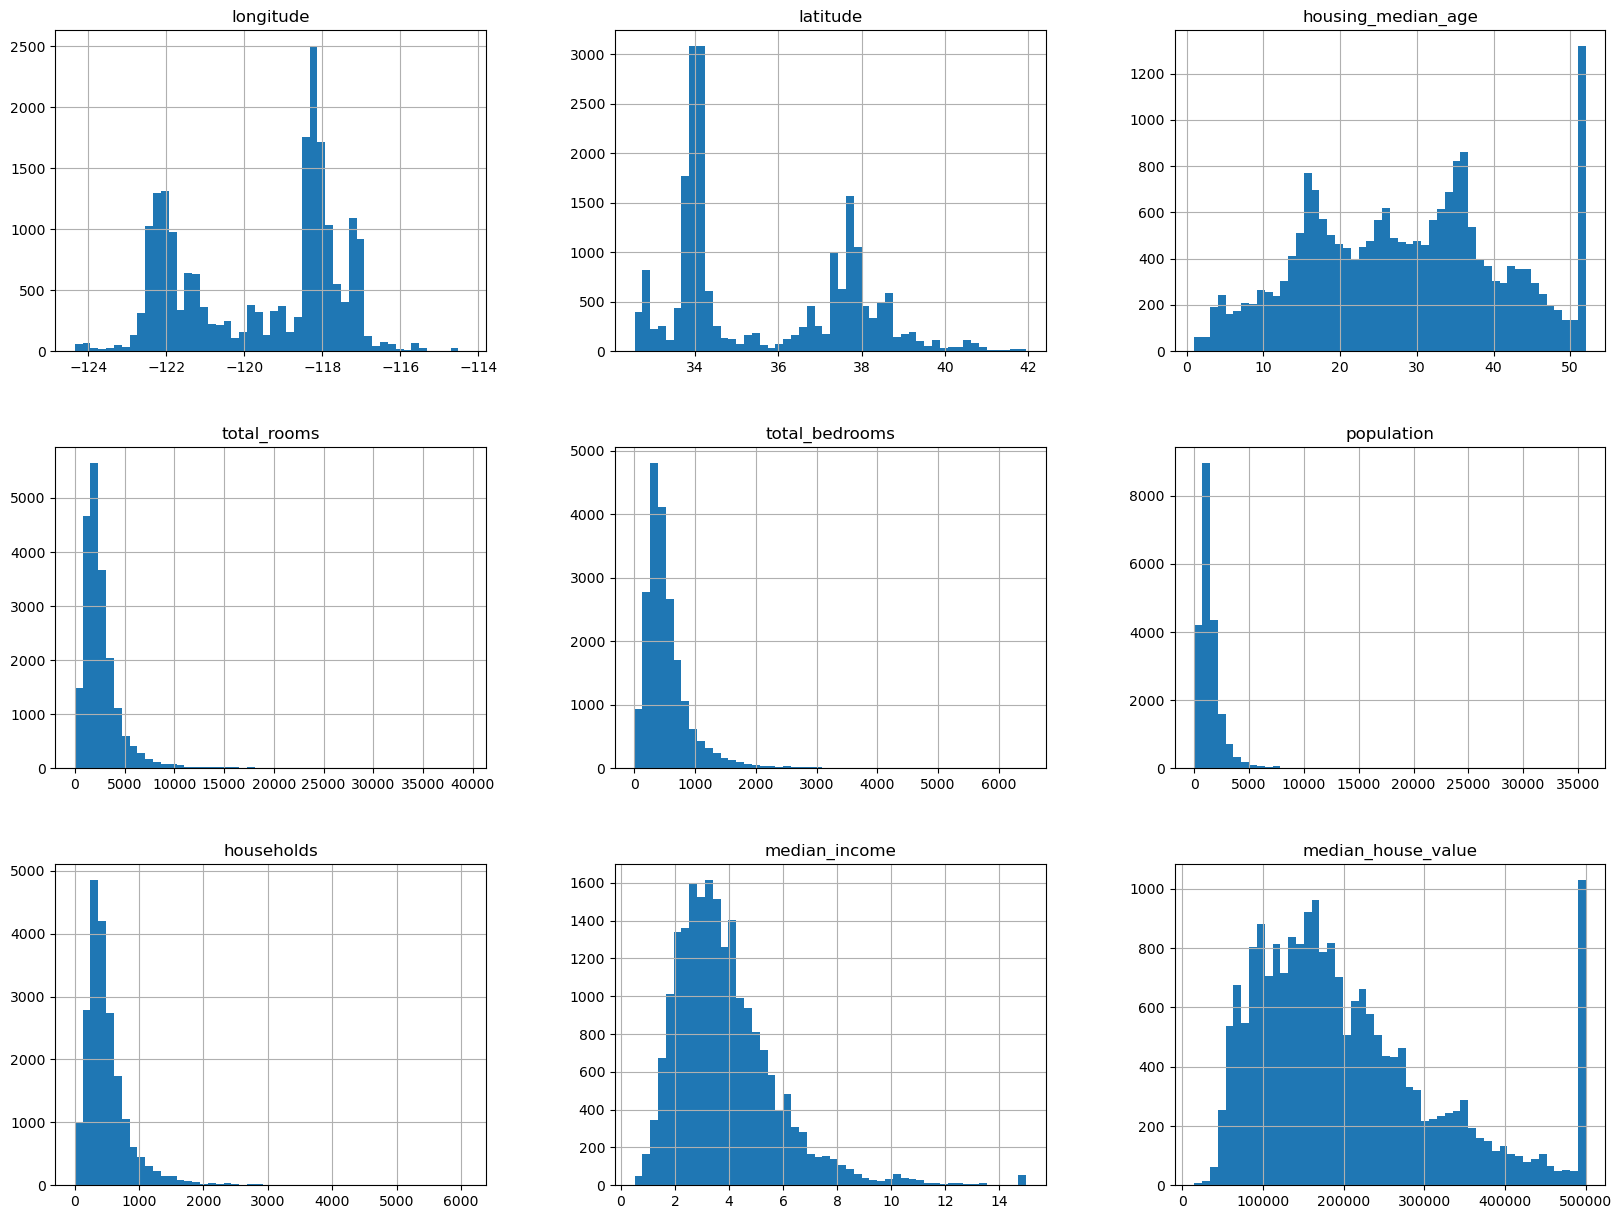

In [15]:
cali.hist(bins=50 ,figsize=(20,15))

#### *  Ploted the histogram to visualize the distribution of data and it's also used to detect the outliers and to see the skewness of the data

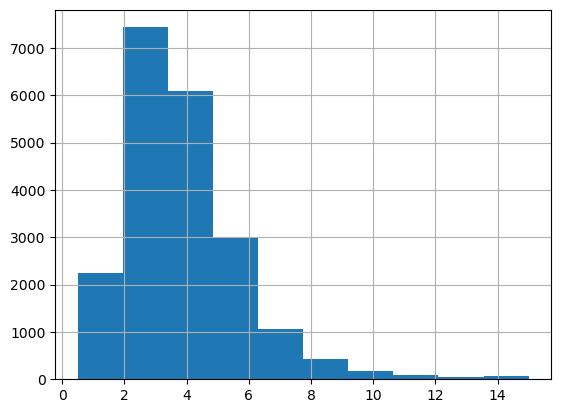

In [16]:
cali['median_income'].hist();

In [17]:
cali['income_cat'] = pd.cut(cali['median_income'],
                           bins=[0.,1.5,3.0,4.5,6.,np.inf],
                           labels=[1,2,3,4,5])

#### * Making median_income into bins 

In [18]:
cali['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

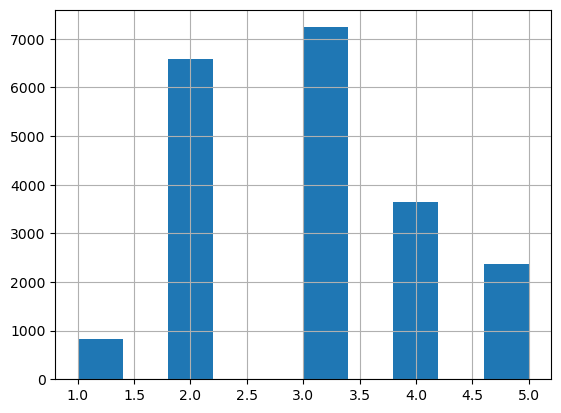

In [19]:
cali['income_cat'].hist()

In [20]:
cali.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


##### * Calculating the correlation to check the relationship between each column in our data set. 

In [21]:
cali.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [22]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


# Discover and Visualize The Data To Gain Insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

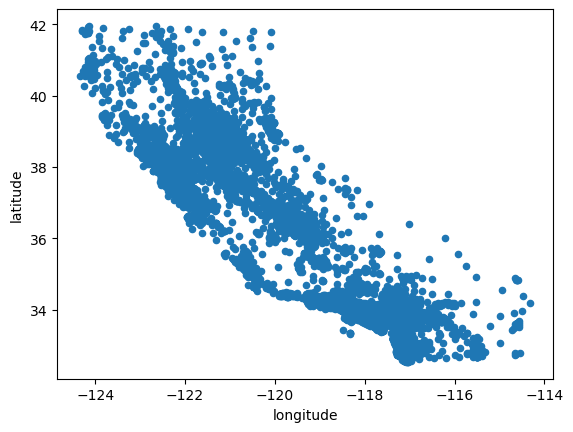

In [23]:
cali.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

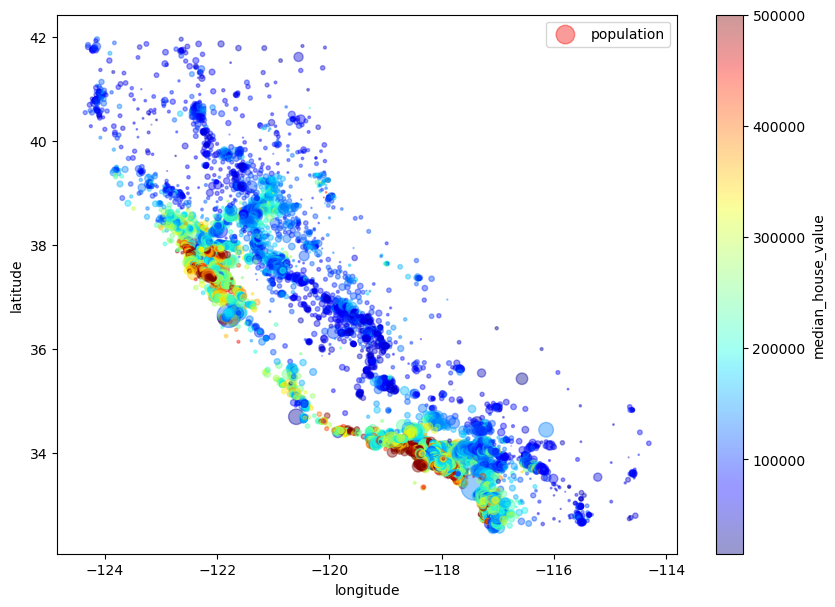

In [24]:
cali.plot(kind='scatter',x='longitude',y='latitude',
         alpha=0.4,
         s=cali['population']/100,
         label='population',
         figsize=(10,7),
         c='median_house_value',
         cmap= plt.get_cmap("jet"),
         colorbar=True,
         sharex=False)

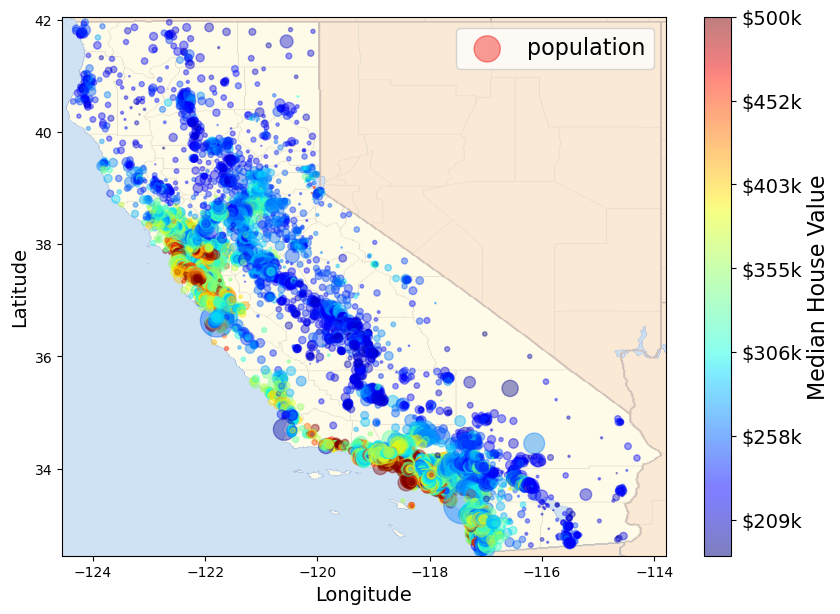

In [25]:
import matplotlib.image as mpimg
california_img = mpimg.imread('california.png')
ax = cali.plot(kind = 'scatter', x = 'longitude' , y = 'latitude',
              figsize = (10,7),
              s = cali['population']/50, label = 'population',
              c = 'median_house_value', cmap = plt.get_cmap('jet'),
              colorbar = False, alpha = 0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45 , 42.05],
           alpha = 0.5,
           cmap = plt.get_cmap('jet'))

plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)

prices = cali['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(),11)
cbar = plt.colorbar(ticks = tick_values/prices.max())
cbar.ax.set_yticklabels(['$%dk'%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label('Median House Value',fontsize=16)

plt.legend(fontsize=16)
plt.show() 

# Prepare the data for machine learning algorithms

### Handling the missing value 

In [27]:
cali['total_bedrooms'].isna().sum()

207

In [28]:
Fill_total_bedrooms=cali["total_bedrooms"].dropna()

In [29]:
median = cali['total_bedrooms'].median()
Fill_total_bedrooms = cali['total_bedrooms'].fillna(median,inplace=True)

#### Fillaing the missing value with the median values 

In [31]:
cali['total_bedrooms'].isnull().sum()

0

#### There are no missing value now 

# impute the missing value

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
ocean_prox = cali.drop('ocean_proximity',axis=1)

In [35]:
imputer.fit(ocean_prox)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [37]:
ocean_prox.median()

C:\Users\Ayush Kale\AppData\Local\Temp\ipykernel_24012\2089330142.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ocean_prox.median()


longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

#### Transform the training set:

In [38]:
imputer.transform(ocean_prox)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  8.3252e+00,
         4.5260e+05,  5.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  8.3014e+00,
         3.5850e+05,  5.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  7.2574e+00,
         3.5210e+05,  5.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.7000e+00,
         9.2300e+04,  2.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  1.8672e+00,
         8.4700e+04,  2.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  2.3886e+00,
         8.9400e+04,  2.0000e+00]])

#### Category of california housing price

In [40]:
cali_cat = cali[['ocean_proximity']]
cali_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


## Ordinal Encoder 

In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cali_cat_encoded = ordinal_encoder.fit_transform(cali_cat)
cali_cat_encoded[:5]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## One hot Encoder

In [45]:
ocean_prox = pd.get_dummies(cali['ocean_proximity'])

In [46]:
ocean_prox.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [47]:
cali = pd.concat([cali,ocean_prox], axis=1)

In [48]:
cali.drop(['ocean_proximity'],axis=1,inplace = True)

# select and train a model

In [49]:
X = cali.drop(['median_house_value'],axis=1).values
y = cali['median_house_value'].values

#### * Standardization 

In [51]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaled=scaler.fit_transform(X)

#### * Split the data into train and test 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2 , random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [55]:
print('Intercept',reg.intercept_)
print('Coefficient',reg.coef_)

Intercept 207044.9437378876
Coefficient [-5.33245333e+04 -5.38887432e+04  1.46392375e+04 -1.70410910e+04
  4.69801395e+04 -4.22715092e+04  1.73539041e+04  6.49422005e+04
  1.22991592e+04  6.58073946e+17  6.16688854e+17  2.06186133e+16
  4.16109844e+17  4.43780995e+17]


In [56]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#### * Performance measured 

In [58]:
from sklearn import metrics

print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error:',metrics.mean_squared_error(y_test,y_test_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('R-2:',metrics.r2_score(y_test,y_test_pred))

Mean absolute error: 50931.92018378224
Mean squared error: 4903374775.929977
Root mean squared error: 70024.10139323444
R-2: 0.6258134019722381


#### * The R-Square value we got is 0.62 

#### Decision tree regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtr,X_test,y_test, cv=10)

In [64]:
dtr = np.sqrt(scores)
print(dtr)
print('mean of cv',dtr.mean())

[0.79199549 0.79368276 0.69459614 0.66486719 0.70261138 0.74725444
 0.79020364 0.67140537 0.77350671 0.72072373]
mean of cv 0.7350846851340914
